# Introduction:

Establish the questions that are being asked and the way they will be answer. Why are we asking these questions and why did I choose this route to solve them?

Outline the rest of the paper.

In [70]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum
import datetime
from scipy import stats

****
### Question 1:

In [71]:
"""
Import Data
"""
#Assessment Page Views
page_views = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assessment Page Views Fall 2018 Clean.csv', nrows = 10000, index_col = 0)
#Final Grade Export
grades = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Student Final Grades 2018 Anonymous.csv', index_col = 0)
#
grades_f2f_quiz = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/grades detailed/Course Grades (Detail View) Fall 2018.xlsx - F2F Quizzes.csv', index_col = 0)
#
grades_online = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/grades detailed/Course Grades (Detail View) Fall 2018.xlsx - Online.csv', index_col = 0)
#
grades_f2f_test = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/grades detailed/Course Grades (Detail View) Fall 2018.xlsx - F2F Tests.csv', index_col = 0)


In [72]:
page_views.head()

,assessment_attempt_id,assessment_type,canvas_assignment_id,canvas_course_id,canvas_section_id,created_at,duration,id,load_time,page_id,raw_lti_param_ext_outcome_submission_submitted_at_accepted,submit_time,user_param_external_user_id
0,289769,MentalHealthChapterAssessment,42549.0,640,1193.0,2018-11-09 10:37:31 UTC,1277.0,6475582,2018-11-09 10:37:37 UTC,76,True,2018-11-09 10:37:39 UTC,38922
1,286863,KsuStressChapterAssessment,41440.0,641,1196.0,2018-11-09 10:38:07 UTC,2720.0,6475589,2018-11-09 10:38:03 UTC,50,True,2018-11-09 10:38:06 UTC,37374
2,289769,MentalHealthChapterAssessment,42549.0,640,1193.0,2018-11-09 10:39:47 UTC,736.0,6475595,2018-11-09 10:39:53 UTC,78,True,2018-11-09 10:39:54 UTC,38922
3,289769,MentalHealthChapterAssessment,42549.0,640,1193.0,2018-11-09 10:41:25 UTC,61.0,6475621,2018-11-09 10:41:32 UTC,85,True,2018-11-09 10:41:32 UTC,38922
4,289769,MentalHealthChapterAssessment,42549.0,640,1193.0,2018-11-09 10:41:26 UTC,22.0,6475623,2018-11-09 10:41:34 UTC,85,True,2018-11-09 10:41:34 UTC,38922


In [73]:
"""
Create dataframe grouped by assessment_type and average duration
"""
type_avg_duration = pd.DataFrame(page_views.groupby(['assessment_type'])['duration'].mean())
type_avg_duration = type_avg_duration.reset_index()
type_avg_duration.columns = ['assessment_type', 'avg_duration']
type_avg_duration.head()

,assessment_type,avg_duration
0,BehaviorChangeChapterAssessment,5957.079470
1,BodyMassIndexAssessment,6224.692308
2,CalorieBmrAssessment,7815.461538
3,CurlUpAssessment,9241.600000
4,FamilyHistoryAssessment,25365.000000


In [74]:
"""
Find a way to identify students above and below this duration. State my goals and what I actually want to find out
tomorrow morning. I'll have to talk with Jenn and narrow it down again.
Come up with concrete questions to ask and a plan of action to show her.
Start work at 10:30 sharp. Work until about 11:15. Then start getting ready for the rapids. I can take the
laptop in the car if necessary for work. It'll be a 1hr 15min drive.

work in the car, so charge my laptop. Decide what I want to do in the car first.

1. seperate all entries into above and below the average for that assignment. Might take a hefty function for that.
    - Above will be a df and below will be a df
2. Find a way to match the assessment_type entry and page_view to the student's grade on the assessment. Do a merge?
3. Graph the grade distribution for above and below. Only take first attempts though? Second attempts should be 
seperated into their own graphs I think
    - Or maybe group by student and assessment_type and then average the duration of all their attempts. Then start 
    filtering them out of the above and below. I feel like this removes something important, so I won't do that.
    - The dataframe is also an entry for a page_view that is on an assessment. So the assessment grade will be 
    related to an assessment_type, attempt_id, and user_id I think. The highest score or the last attempt is what they will
    keep. Do they really keep the grade for each attempt? how would I get that information? assessment_responses?
    - Keep it simple stupid. I should average all of their attempts or maybe add them together to take into account
    the 'total' time they spent on the assessment.
    - I could create a similar thing that does user_id --> assessment_type --> number of attempts and correlate that with 
    grade on the assessment.
    * Then I could need to find the average number of attempts or just draw attempt number with a better grade on the guided
    learning which would make sense since they should be getting better at it. I should really correlate the average number of 
    attempts each student too on the assessments in guided learning and then correlate that with their final grade in the class,
    their average quiz grades, or maybe their midterm grade.
    * Using duration, I need to look at the grades thing again. It seems useless to correlate it to a grade in guided learning
    since it is mostly completion and more attempts would obviously lead to a better score since you can just guess 4-5 
    times to get the corect answer. I propose getting the average time a student spent on the assessment_type, and compare that too
    the average for all students. Then group the students into two groups of above and below. Then just test the 
    correlation with various factors. I have to do some linear regressions and confidence intervals and margin of error
    and what not. I could also do a hypothesis test whether the mean grade on stuff between the two is the same or not
    with a t-test hypothesis test using the mean. I would do the same confidence interval and margin of error.
    That would be pretty dope analysis. 
    - The other two questions can be more for just perceivant. How about for this project. I turn it in with just two
    questions answered. Then start working on the milestone report while also brainstorming for the third questions.
    I can turn it in a little bit later, but I need to get a move on with my progress.
    
To-do: create a dataframe of average attempts for each student for all assessment_types
create a dataframe of average time spent on each assessment_type. 
Then an average for each student across all assessment_types.
After that I can focus on correlating things with different types of grades and also bucketing students and stuff.
4. How to get these on like the same axis or something.

"""

"\nFind a way to identify students above and below this duration. State my goals and what I actually want to find out\ntomorrow morning. I'll have to talk with Jenn and narrow it down again.\nCome up with concrete questions to ask and a plan of action to show her.\nStart work at 10:30 sharp. Work until about 11:15. Then start getting ready for the rapids. I can take the\nlaptop in the car if necessary for work. It'll be a 1hr 15min drive.\n\nwork in the car, so charge my laptop. Decide what I want to do in the car first.\n\n1. seperate all entries into above and below the average for that assignment. Might take a hefty function for that.\n    - Above will be a df and below will be a df\n2. Find a way to match the assessment_type entry and page_view to the student's grade on the assessment. Do a merge?\n3. Graph the grade distribution for above and below. Only take first attempts though? Second attempts should be \nseperated into their own graphs I think\n    - Or maybe group by student

In [75]:
student_avg_duration = pd.DataFrame(page_views.groupby(['user_param_external_user_id','assessment_type'])['duration'].mean())
student_avg_duration = student_avg_duration.reset_index()
student_avg_duration.columns = ['user_param_external_user_id','assessment_type', 'avg_duration']
student_avg_duration.head()



,user_param_external_user_id,assessment_type,avg_duration
0,2168,KsuNutritionChapterAssessment,2833.333333
1,2168,KsuStressChapterAssessment,271.000000
2,2886,KsuWeightManagementChapterAssessment,15274.000000
3,2899,SyllabusGeneralChapterAssessment,2890.500000
4,3562,BehaviorChangeChapterAssessment,2675.500000


In [76]:
student_avg_duration_all = pd.DataFrame(page_views.groupby(['user_param_external_user_id'])['duration'].mean())
student_avg_duration_all = student_avg_duration_all.reset_index()
student_avg_duration_all.columns = ['user_param_external_user_id', 'avg_duration']
student_avg_duration_all.head()

,user_param_external_user_id,avg_duration
0,2168,1808.4
1,2886,15274.0
2,2899,2890.5
3,3562,5685.8
4,3892,559.4


In [77]:
student_attempt_count = pd.DataFrame(page_views.groupby(['user_param_external_user_id','assessment_type'])['assessment_attempt_id'].count())
student_attempt_count = student_attempt_count.reset_index()
student_attempt_count.columns = ['user_param_external_user_id','assessment_type', 'attempt_count']
student_attempt_count.head()



,user_param_external_user_id,assessment_type,attempt_count
0,2168,KsuNutritionChapterAssessment,3
1,2168,KsuStressChapterAssessment,2
2,2886,KsuWeightManagementChapterAssessment,1
3,2899,SyllabusGeneralChapterAssessment,2
4,3562,BehaviorChangeChapterAssessment,6


In [78]:
student_avg_attempt = pd.DataFrame(student_attempt_count.groupby(['user_param_external_user_id'])['attempt_count'].mean())
student_avg_attempt = student_avg_attempt.reset_index()
student_avg_attempt.columns = ['user_param_external_user_id','avg_attempts']
print(student_avg_attempt.shape)
student_avg_attempt.head()



(1301, 2)


,user_param_external_user_id,avg_attempts
0,2168,2.5
1,2886,1.0
2,2899,2.0
3,3562,5.0
4,3892,5.0


In [79]:
"""
First test for correlation between attempts on guided learning and final grade in the course.
"""

'\nFirst test for correlation between attempts on guided learning and final grade in the course.\n'

In [80]:
grades.shape

(3156, 16)

In [81]:
#have to do a merge first
final_grades_by_attempts = pd.merge(student_avg_attempt, grades, left_on = ['user_param_external_user_id'], right_on = ['student id'], how = 'inner')

print(final_grades_by_attempts.shape)
final_grades_by_attempts.head()


(1312, 18)


,user_param_external_user_id,avg_attempts,student id,student sis,course,course id,course sis,section,section id,section sis,term,term id,term sis,current score,final score,enrollment state,unposted current score,unposted final score
0,2168,2.5,2168,NaN,WELL1000 Foundations for Healthy Living - Onli...,637,NaN,WELL 1000/W70,1187,NaN,Fall 2018,20,NaN,53.57,51.19,active,53.57,51.19
1,2886,1.0,2886,NaN,WELL1000 Foundations for Healthy Living - Mart...,645,NaN,WELL1000/20,1203,NaN,Fall 2018,20,NaN,82.69,82.69,active,82.69,82.69
2,2899,2.0,2899,NaN,WELL1000 Foundations for Healthy Living - Onli...,638,NaN,WELL 1000/W75,1190,NaN,Fall 2018,20,NaN,58.25,55.62,active,58.25,55.62
3,3562,5.0,3562,NaN,WELL1000 Foundations for Healthy Living - Rave...,654,NaN,WELL 1000/30,1219,NaN,Fall 2018,20,NaN,92.02,92.02,active,92.02,92.02
4,3892,5.0,3892,NaN,WELL1000 Foundations for Healthy Living - Onli...,659,NaN,WELL 1000/W87,1230,NaN,Fall 2018,20,NaN,75.05,75.05,active,75.05,75.05


In [82]:
x = final_grades_by_attempts['avg_attempts']
y = final_grades_by_attempts['unposted final score']

In [83]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [84]:
print(slope, intercept, r_value, p_value, std_err)

-0.026845710656406153 85.07442693281664 -0.007142270992525314 0.7960513231213778 0.10384649803341589


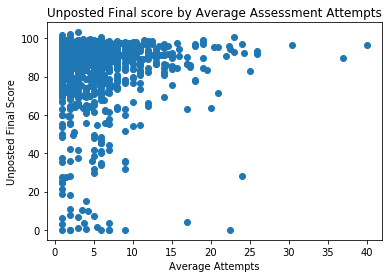

In [101]:
_ = plt.scatter(x, y)
_ = plt.title('Unposted Final score by Average Assessment Attempts')
_ = plt.xlabel('Average Attempts')
_ = plt.ylabel('Unposted Final Score')
plt.show()

In [86]:
"""
Alright so basically no correlation at all here.

I'll have to do some more specialized test.
"""

"\nAlright so basically no correlation at all here.\n\nI'll have to do some more specialized test.\n"

In [87]:
"""
Correlation between duration and grade

First bucket the students in above and below the average duration.

Then get grade distributions for each. 
Check for correlations between them and final quiz grades, midterm grades, and final grades and such

I could even do some bootstrapping to see if that is relevant at all. Not sure yet. I'll do it if I get an unclear p-value.
"""

"\nCorrelation between duration and grade\n\nFirst bucket the students in above and below the average duration.\n\nThen get grade distributions for each. \nCheck for correlations between them and final quiz grades, midterm grades, and final grades and such\n\nI could even do some bootstrapping to see if that is relevant at all. Not sure yet. I'll do it if I get an unclear p-value.\n"

In [88]:
student_avg_duration.head()

,user_param_external_user_id,assessment_type,avg_duration
0,2168,KsuNutritionChapterAssessment,2833.333333
1,2168,KsuStressChapterAssessment,271.000000
2,2886,KsuWeightManagementChapterAssessment,15274.000000
3,2899,SyllabusGeneralChapterAssessment,2890.500000
4,3562,BehaviorChangeChapterAssessment,2675.500000


In [89]:
student_avg_duration_all.head()

,user_param_external_user_id,avg_duration
0,2168,1808.4
1,2886,15274.0
2,2899,2890.5
3,3562,5685.8
4,3892,559.4


In [90]:
#merge in grades column
final_grades_by_duration = pd.merge(student_avg_duration_all, grades, left_on = ['user_param_external_user_id'], right_on = ['student id'], how = 'inner')



In [91]:
#The average duration for all students
average_duration = final_grades_by_duration.avg_duration.mean()
above_avg_duration = final_grades_by_duration[final_grades_by_duration.avg_duration >= average_duration]
below_avg_duration = final_grades_by_duration[final_grades_by_duration.avg_duration < average_duration ]

In [92]:
print(above_avg_duration.head())
print(below_avg_duration.head())

    user_param_external_user_id  avg_duration  student id  student sis  \
1                          2886       15274.0        2886          NaN   
5                          6958       11338.0        6958          NaN   
6                         12553       25302.5       12553          NaN   
12                        16725       21757.0       16725          NaN   
14                        20055       16347.5       20055          NaN   

                                               course  course id  course sis  \
1   WELL1000 Foundations for Healthy Living - Mart...        645         NaN   
5   WELL1000 Foundations for Healthy Living - Onli...        638         NaN   
6   WELL1000 Foundations for Healthy Living - Whit...        658         NaN   
12  WELL1000 Foundations for Healthy Living - Aenc...        626         NaN   
14  WELL1000 Foundations for Healthy Living - Onli...        635         NaN   

          section  section id  section sis       term  term id  term sis  

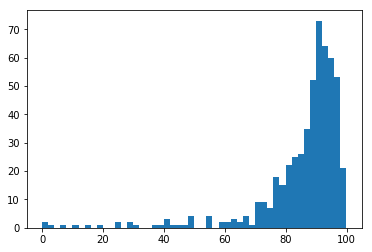

85.54768361581927


In [96]:
_ = plt.hist(x = above_avg_duration['unposted final score'], bins = 50)
plt.show()
print(above_avg_duration['unposted final score'].mean())

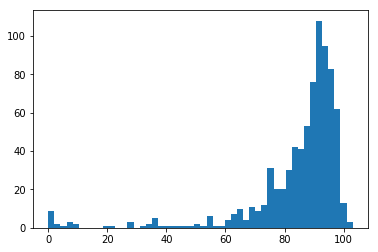

84.54563380281681


In [95]:
_ = plt.hist(x = below_avg_duration['unposted final score'], bins = 50)
plt.show()
print(below_avg_duration['unposted final score'].mean())

In [97]:
#T-test for difference of means
stat, p = stats.ttest_ind(above_avg_duration['unposted final score'], below_avg_duration['unposted final score'])
print("p = ", p)

p =  0.2782323837362156


In [99]:
#Confidence Interval for the difference of means
empirical_diff = above_avg_duration['unposted final score'].subtract(below_avg_duration['unposted final score'], fill_value=0)
conf_int = np.percentile(empirical_diff, [2.5, 97.5])
print('95% confidence interval =', conf_int)


95% confidence interval = [-98.15025  97.29225]


In [100]:
#Margin of error
prob = 0.95
df = len(empirical_diff) - 1
sem = np.std(empirical_diff) / np.sqrt(len(empirical_diff))
value = stats.t.ppf(prob, df)
me = value * sem
print('Margin of Error', np.abs(me)*100, '%')

Margin of Error 386.65681657436465 %


In [102]:
#Linear Regression
x = final_grades_by_duration['avg_duration']
y = final_grades_by_duration['unposted final score']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

4.087913570621825e-05 84.68520308835511 0.012908543110558985 0.6403989215909673 8.74888365860784e-05


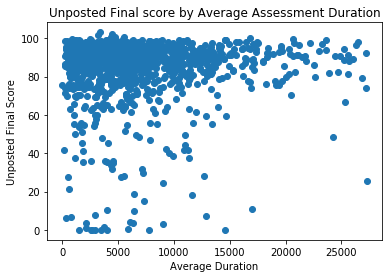

In [103]:
_ = plt.scatter(x, y)
_ = plt.title('Unposted Final score by Average Assessment Duration')
_ = plt.xlabel('Average Duration')
_ = plt.ylabel('Unposted Final Score')
plt.show()

In [ ]:
"""
This one also yielded next to know good results.

I'll need to bucket further and see if there is anything interesting. I need to ask more specific questions.
I should also keep track of the questions I want to ask and have asked. It should come down to two big topics that
are described by like 3-4 smaller ideas which can be broken up into =< 10 small tests.

I should move away form just final grades, I should also differentiate by class, and maybe get a better measure than
just AVERAGE duration/attempts for all guided learning. I could do better bucketing or something.
"""

****
### Question 2:

****
### Question 3:

****
# Conclusion:

Conclude everything. Each question on its own should have a notes section and interpretation thing. This should be more of a summary of the findings.

The report that needs to be submitted to springboard will markdown page with inserted graphs as images and stuff.